COMP90024 Project Team 1

Authors:
- Henrik Hao (1255309)
- Haoyi Li (1237964)
- Zilin Su (1155122)
- Angela Yifei Yuan (1269549)

In [23]:
YEARS = ["2016", "2017", "2018", "2019", "2020", "2021"]
%run functions_admission_analysis.py

<h3>Australia respiratory admissions</h3>

In this section we are going to look at the ditribution of respiratory admission in australia based on PHA which is Population Health Areas based on the Statistical Areas Level 2 (SA2).
SA2:
- Motivation: the number of cases in some population health datasets would be too small to map, particularly in non-metropolitan areas.
- Mappings from PHA to SA2s are available 
- Other location partitions available: LGA, PHN (Quintiles, Remoteness)

In [ ]:
pha_addmision = pha_admission_data("Respiratory")
pha_addmision_df = pd.DataFrame.from_records(pha_addmision)

# respiratory disease 2017 according by pha and gender
pha_addmision_df = pha_addmision_df[pha_addmision_df["disease"] == "Respiratory disease"]
pha_addmision_df = pha_addmision_df[pha_addmision_df["year"] == "2017"]
pha_addmision_df = pha_addmision_df[["year", "population", "pha", "sex"]]
pha_gender_2017 = pd.DataFrame(pha_addmision_df.groupby(["pha", 'year','sex'])["population"].sum())
pha_gender_2017 = pha_gender_2017.reset_index()
pha_gender_2017["pha"] = pha_gender_2017["pha"].astype(int)

In the index 'hospital_admissions_pha' dataset, there are some population values that appear as '185.0216.0,' which is not a possible value. At this stage, we choose to round every value to 1 decimal place.

For missing values, we simply enter 0. (Filling with the average is not suitable because the area might be a desert where no admissions are possible.)

In [ ]:
pha_gender_2017["population"] = pha_gender_2017["population"].replace('', 0)
for i in range(len(pha_gender_2017["population"])):
    try:
        float(pha_gender_2017["population"][i])
        pha_gender_2017["population"][i] = float(pha_gender_2017["population"][i])
    except:
        pha_gender_2017["population"][i] = re.search(r'^(\d+)\.\d+', pha_gender_2017["population"][i]).group(1)

We will focus solely on the data for the year 2017 due to the reasons below:

- Limited availability of data in 2015, 2017, and 2018.
- 2015 and 2018 data contain many missing values.
- The analysis target is to compare the relationship between admissions and gender, preferring each Public Health Authority (PHA) area to include data for both males and females.

The dataset we use include information about:
- Columns: 
  - PHA code
  - geomatry : coordinates
  - year : 2017
  - sex : male, female
  - population : number of admissions

In [ ]:
# load shape file for pha 2016
geo_pha = gpd.read_file("../elasticsearch/dataset/pha_2016/PHA_2016_AUST_Gen50.shp")
geo_pha.rename(columns={"PHA_CODE16":"pha"}, inplace=True)
geo_pha["pha"] = geo_pha["pha"].astype(int)
# combine the shape file and the population with pha and handing missing values
geo_resp_pha = pd.merge(geo_pha, pha_gender_2017, on='pha')
#geo_resp_pha = geo_resp_pha[geo_resp_pha['population'] != ""]
geo_resp_pha["population"] = geo_resp_pha["population"].replace('', 0)
geo_resp_pha["year"] = geo_resp_pha["year"].astype(int)
geo_resp_pha[["pha", "geometry", "year", "sex", "population"]].head(3)

,pha,geometry,year,sex,population
0,10283,"POLYGON ((1560571.008 1626072.468, 1561492.168...",2017,females,112.0
1,10283,"POLYGON ((1560571.008 1626072.468, 1561492.168...",2017,males,132.0
2,10225,"POLYGON ((1440393.350 1457199.227, 1440124.988...",2017,females,155.0


<h3>Admission Population in Each PHA Area 2017</h3>

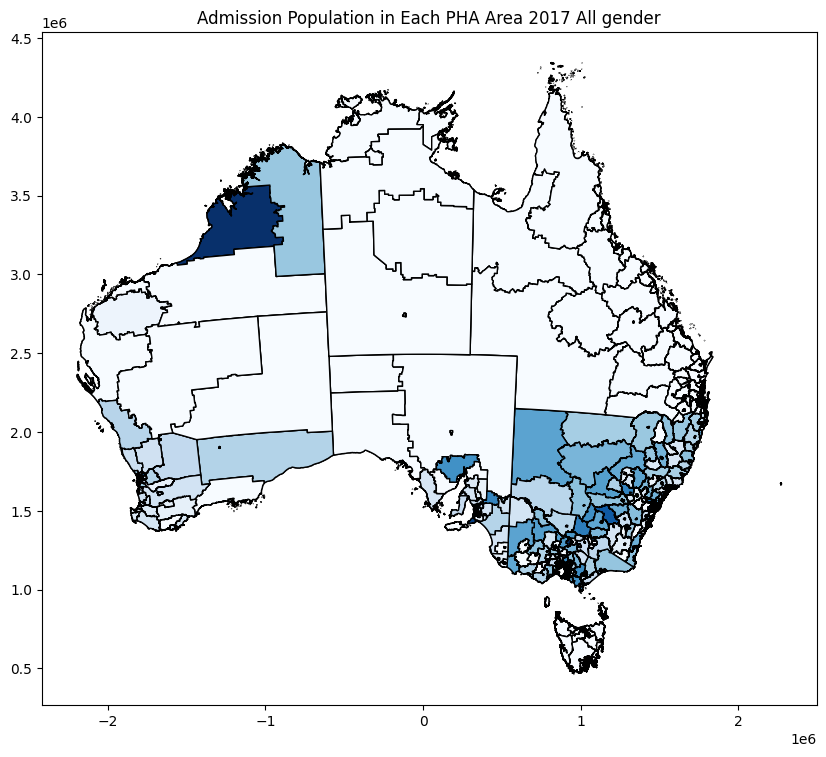

In [ ]:
# Plot each "pha" area boundary
gdf = gpd.GeoDataFrame(geo_resp_pha, geometry='geometry')

# Plot the choropleth map
ax = gdf.plot(column='population', cmap='Blues', figsize=(10, 10), edgecolor='k')

# Add title
plt.title('Admission Population in Each PHA Area 2017 All gender')

# Show the plot
plt.show()

This graph displays the number of admissions in different areas of Australia. From this graph, we can observe that admissions are predominantly concentrated in areas with high population density. For example, the lower left corner, representing VIC and NSW, the economic centers of Australia, exhibits a high number of admissions (darker color), while the central regions of Australia, characterized by deserts, show no admissions. This absence of admissions is because those areas are uninhabited.

/tmp/ipykernel_10129/3265688165.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


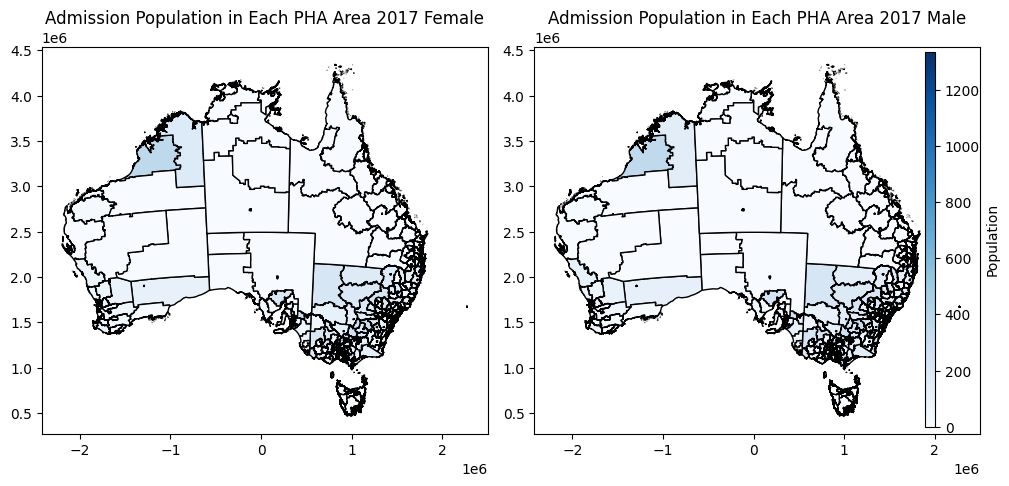

In [ ]:
# compare the difference between genders for each pha

resp_female = geo_resp_pha[geo_resp_pha["sex"] == "females"]
resp_male = geo_resp_pha[geo_resp_pha["sex"] == "males"]

# Plot each "pha" area boundary
gdf_female = gpd.GeoDataFrame(resp_female, geometry='geometry')
gdf_male = gpd.GeoDataFrame(resp_male, geometry='geometry')

# Find the maximum population count for both sexes
max_population = max(gdf_female['population'].max(), gdf_male['population'].max())

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the choropleth maps in each subplot
norm = Normalize(vmin=0, vmax=max_population)  # Normalization for color scale
mapper = ScalarMappable(norm=norm, cmap='Blues')  # Color mapper

gdf_female.plot(ax=axs[0], column='population', cmap='Blues', edgecolor='k', norm=norm)
axs[0].set_title('Admission Population in Each PHA Area 2017 Female')

gdf_male.plot(ax=axs[1], column='population', cmap='Blues', edgecolor='k', norm=norm)
axs[1].set_title('Admission Population in Each PHA Area 2017 Male')

# Add color bar
cax = fig.add_axes([0.93, 0.13, 0.01, 0.75]) # [left, bottom, width, height]
cbar = fig.colorbar(mapper, cax=cax, shrink = 0.5)
cbar.set_label('Population')

# Adjust layout
plt.tight_layout()

This graph compares the population for male and female admissions in different PHA areas. According to these two graphs, there is no significant difference. Thus, the contrast between male and female admissions in various PHA areas is not evident.

Therefore, for the following analysis, we do not consider gender as an important factor for admissions. Furthermore, to identify feasible potential relationships, our team has decided to conduct research in NSW, as this area includes adequate data for all factors we are going to use.

<h3>NSW Respiratory Admissions</h3>

While focusing on bushfires and air quality in **NSW**, it is impossible to ignore the relationship between admissions for respiratory diseases and these factors. The direct connection between air pollution and respiratory diseases in humans is well-established.

Therefore, we analyzed the distribution of respiratory diseases in NSW from **2016 to 2021**.

In [33]:
nsw_data_df = yearly_nsw_data(YEARS)
nsw_data_df.head(3)

,year,month,disease,age,population,proportion
0,2016,1,Res p,45+ years,6441,67.0
1,2016,2,Respiratory - acute respiratory infection,45+ years,5907,61.5
2,2016,3,Respiratory - acute respiratory infection,45+ years,6783,70.6


Although age is included in the dataset as a factor, it cannot be effectively used for comparison. This is because under different diseases, the relationship between age and admissions may vary, and the measurement levels of age may differ, making it unreasonable to use age as a factor for comparison.

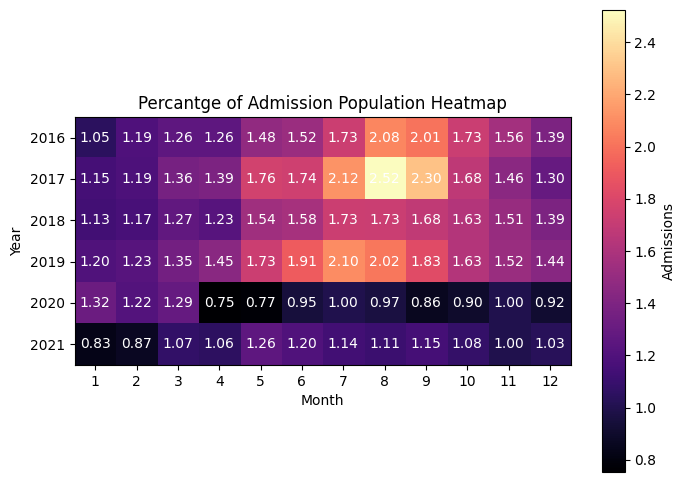

In [4]:
# pivot table for year month admission percentage
total_admissions = nsw_data_df["population"].sum()
year_month_population = pd.DataFrame(nsw_data_df.groupby(["year", "month"])["population"].sum()/total_admissions*100).reset_index()
pivot_table = year_month_population.pivot_table(index='year', columns='month', values='population', aggfunc='sum')
# Plotting the pivot table as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='magma', interpolation='nearest')
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = pivot_table.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='white')
plt.colorbar(label='Admissions')
plt.title('Percantge of Admission Population Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()

According to this pivot heatmap, compared with 2016-2019, **the number of respiratory admissions in 2020 and 2021 shows a significant decrease**. This may be due to the lockdown during the COVID-19 period, as fewer people chose to go to the hospital. Additionally, COVID-19 was not included as a respiratory disease at that time.

Furthermore, the graph shows that the **number of admissions usually increases in winter and decreases in summer**. This indicates that people are more likely to get respiratory diseases in winter.

<h3>The Relationship between Number of Admissions and the Number of Bushfire</h3>

To show the relationship between the number of admissions and the frequency of bushfires, we analyzed the data in two aspects:

- Compared the percentage of admissions and the percentage of bushfires each year from 2016 to 2021.
- Compared the percentage of admissions and the percentage of bushfires each month from 2016 to 2021.

We chose to use percentages to scale the number of bushfires and the number of admissions to the same numeric level.

Firstly, we retrive bushfire data from elastic search and choose the proper time period.

In [14]:
request_bushfire = requests.get("http://localhost:9090//bushfireget")
data = request_bushfire.json()
bushfire = pd.DataFrame(data)
bushfire["Year"] = bushfire["ignition_date"].apply(lambda x: x[:4]).astype(int)
bushfire["Month"] = bushfire["ignition_date"].apply(lambda x: x[5:7]).astype(int)
bushfire["Date"] = bushfire["ignition_date"].apply(lambda x: x[8:10]).astype(int)

bushfire = bushfire[bushfire["Year"] >= 2016]
bushfire.head(3)

,ignition_date,area_ha,state,geometry,Year,Month,Date
0,2017-02-04,465,NSW (New South Wales),"POLYGON ((152.12167568319 -28.9152132523471, 1...",2017,2,4
2,2019-08-11,0,NSW (New South Wales),"POLYGON ((152.800384607457 -31.2068685183261, ...",2019,8,11
3,2019-12-05,0,NSW (New South Wales),"POLYGON ((153.188491616977 -29.7933787456514, ...",2019,12,5


Secondly, plot the graphs.

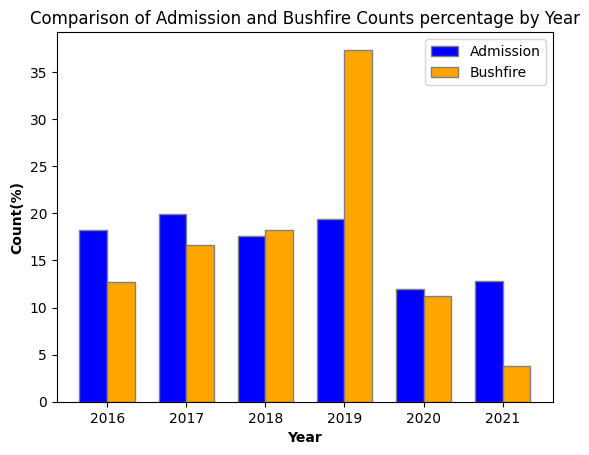

In [7]:
#preprocess
nsw_year_admission_total = nsw_data_df.groupby("year")["population"].sum()
nsw_year_admission_percent = pd.DataFrame(nsw_year_admission_total)["population"]/nsw_year_admission_total.sum()*100
nsw_bushfire_yearly = bushfire.groupby("Year").size().rename("count")
nsw_bushfire_yearly_percent = pd.DataFrame(nsw_bushfire_yearly)["count"]/nsw_bushfire_yearly.sum()*100
nsw_year_admission_percent_df = pd.DataFrame(nsw_year_admission_percent).reset_index()
nsw_bushfire_yearly_percent_df = pd.DataFrame(nsw_bushfire_yearly_percent).reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(nsw_year_admission_percent_df))
r2 = [x + bar_width for x in r1]

# Plotting the bar chart
plt.bar(r1, nsw_year_admission_percent_df["population"], color='blue', width=bar_width, edgecolor='grey', label='Admission')
plt.bar(r2, nsw_bushfire_yearly_percent_df["count"], color='orange', width=bar_width, edgecolor='grey', label='Bushfire')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count(%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(nsw_year_admission_percent_df))], nsw_year_admission_percent_df["year"])
plt.title('Comparison of Admission and Bushfire Counts percentage by Year')

# Adding legend
plt.legend()

# Display the plot
plt.show()

This graph shows the relationship between the percentage of admissions and the percentage of bushfires yearly. It illustrates that in 2020 and 2021, the percentage of admissions decreased along with the percentage of bushfires. This suggests that the reduction in the number of bushfires may have impacted the prevalence of respiratory diseases.

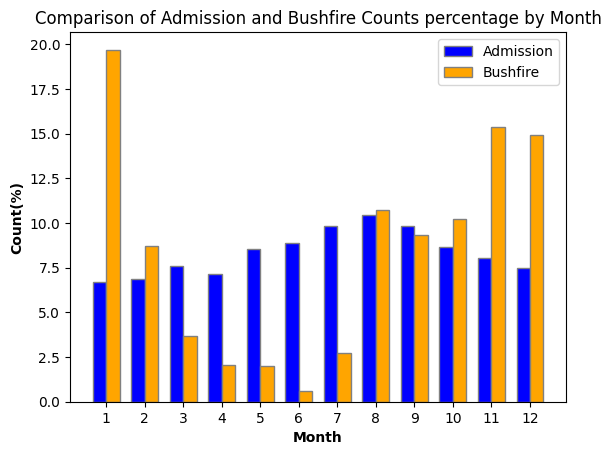

In [8]:
#preprocess
nsw_month_admission_total = nsw_data_df.groupby("month")["population"].sum().sort_index()
nsw_bushfire_month = bushfire.groupby("Month").size().rename("count").sort_index()
nsw_month_admission_percent = pd.DataFrame(nsw_month_admission_total)["population"]/nsw_month_admission_total.sum()*100
nsw_bushfire_month_percent = pd.DataFrame(nsw_bushfire_month)["count"]/nsw_bushfire_month.sum()*100
nsw_month_admission_percent_df = pd.DataFrame(nsw_month_admission_percent).reset_index()
nsw_bushfire_month_percent_df = pd.DataFrame(nsw_bushfire_month_percent).reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(nsw_month_admission_percent_df))
r2 = [x + bar_width for x in r1]

# Plotting the bar chart
plt.bar(r1, nsw_month_admission_percent_df["population"], color='blue', width=bar_width, edgecolor='grey', label='Admission')
plt.bar(r2, nsw_bushfire_month_percent_df["count"], color='orange', width=bar_width, edgecolor='grey', label='Bushfire')

# Adding labels and title
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Count(%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(nsw_month_admission_percent_df))], nsw_month_admission_percent_df["month"])
plt.title('Comparison of Admission and Bushfire Counts percentage by Month')

# Adding legend
plt.legend()

# Display the plot
plt.show()

This graph shows the relationship between the percentage of admissions and the percentage of bushfires monthly from 2016 to 2021. It illustrates that bushfires usually occur in summer, while the number of admissions typically increases in winter. This indicates that within a year, the percentage of admissions is inversely proportional to the percentage of bushfires.

<h3>Relationship amonge Admission, Bushfire, and Air Quality</h3>

First, retrieve data from Elasticsearch and preprocess it.

Preprocessing steps:
- Extract air quality values from the description sentence and convert them to integers.
- Normalize the air quality factors and the number of admissions.

In [11]:
air_quality = yearly_air_quality(YEARS)
airquality_df = pd.DataFrame.from_records(air_quality)
airquality_df["average_pm2p5"] = airquality_df["average_pm2p5"].apply(lambda x: x["value"])
airquality_df["average_pm10"] = airquality_df["average_pm10"].apply(lambda x: x["value"])
airquality_df["average_ozone"] = airquality_df["average_ozone"].apply(lambda x: x["value"])
airquality_df.rename(columns={"key_as_string" : "month"}, inplace=True)
airquality_df["year"] = airquality_df["year"].astype(int)
airquality_df["month"] = airquality_df["month"].astype(int)
admission_airqulity = pd.merge(nsw_data_df, airquality_df, on=["year", "month"])
admission_airqulity.drop_duplicates(inplace=True)
admission_airqulity = admission_airqulity[["year", "month","disease", "age", "population", "average_pm2p5", "average_pm10", "average_ozone"]]
normalization(admission_airqulity, "population")
normalization(admission_airqulity, "average_pm2p5")
normalization(admission_airqulity, "average_pm10")
normalization(admission_airqulity, "average_ozone")
admission_airqulity.head(3)

,year,month,disease,age,population,average_pm2p5,average_pm10,average_ozone,population_normalized,average_pm2p5_normalized,average_pm10_normalized,average_ozone_normalized
0,2016,1,Res p,45+ years,6441,7.422035,18.918722,1.915993,0.310305,0.111894,0.157877,0.480572
2,2016,2,Respiratory - acute respiratory infection,45+ years,5907,7.011979,22.258590,1.867279,0.284361,0.097577,0.226013,0.446971
4,2016,3,Respiratory - acute respiratory infection,45+ years,6783,6.607569,19.409031,1.609153,0.326920,0.083457,0.167880,0.268922


Although there are many indices to evaluate air quality, at this stage, we will choose to consider PM10 as one of the most important factors. This is due to the high correlation between respiratory diseases and PM10 levels.

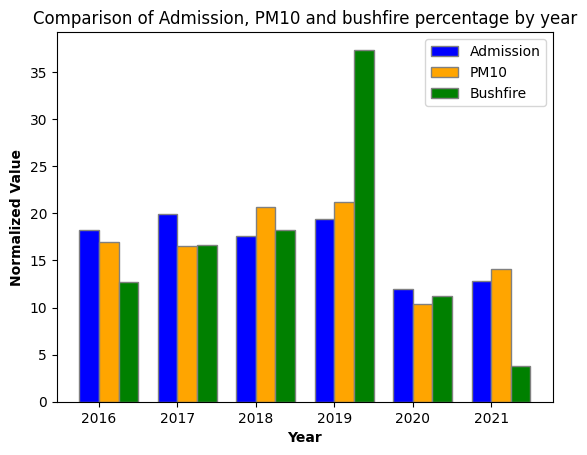

In [16]:
# bushfire & airquality & admission data using percentage

Total_population = admission_airqulity["population"].sum()
Total_PM25 = admission_airqulity["average_pm10"].sum()

asm_yearly_per = pd.DataFrame(admission_airqulity.groupby("year")["population"].sum()/Total_population*100).reset_index()
pm2_5_yearly_per = pd.DataFrame(admission_airqulity.groupby("year")["average_pm10"].sum()/Total_PM25*100).reset_index()

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(asm_yearly_per))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Plotting the bar chart
plt.bar(r1, asm_yearly_per["population"], color='blue', width=bar_width, edgecolor='grey', label='Admission')
plt.bar(r2, pm2_5_yearly_per["average_pm10"], color='orange', width=bar_width, edgecolor='grey', label='PM10')
plt.bar(r3, nsw_bushfire_yearly_percent_df["count"], color='green', width=bar_width, edgecolor='grey', label='Bushfire')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Normalized Value', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(asm_yearly_per))], asm_yearly_per["year"])
plt.title('Comparison of Admission, PM10 and bushfire percentage by year')

# Adding legend
plt.legend()

# Display the plot
plt.show()

This graph shows the relationship among admissions, bushfires, and air quality from 2016 to 2021. We can conclude that these three factors are related to each other, as the trends are similar to the previous yearly graph. The decrease in bushfires and the number of admissions reflect an improvement in air quality.